# NLP Assignment : **Sentiment Analysis using RNN**


*Dataset used :* https://www.kaggle.com/crowdflower/twitter-airline-sentiment

Name : Mazen Karam Mohamed

Id : 20220361



---



## **Import Libraries**

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## **Load the dataset**

In [5]:
df = pd.read_csv('Tweets.csv')

## **Keep only the relevant columns**

In [6]:
df = df[['text', 'airline_sentiment']]

## **Map sentiment labels to numerical values**

In [7]:
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['sentiment'] = df['airline_sentiment'].map(sentiment_mapping)

## **Split the data into training and testing sets**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

## **Tokenize the text data**

In [9]:
max_words = 10000
maxlen = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

## **Convert text to sequences of integers**

In [10]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

## **Pad sequences to ensure uniform input size**

In [11]:
X_train_padded = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_padded = pad_sequences(X_test_seq, maxlen=maxlen)

## **Convert labels to categorical format**

In [12]:
num_classes = 3
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes)

## **Define the RNN model**

In [13]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=maxlen),
    SimpleRNN(64, return_sequences=False),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## **Train the model**

In [14]:
history = model.fit(
    X_train_padded, y_train_categorical,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.5883 - loss: 0.9029 - val_accuracy: 0.7337 - val_loss: 0.6421
Epoch 2/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.8195 - loss: 0.4828 - val_accuracy: 0.7674 - val_loss: 0.5800
Epoch 3/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.9195 - loss: 0.2553 - val_accuracy: 0.7691 - val_loss: 0.6151
Epoch 4/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.9704 - loss: 0.1117 - val_accuracy: 0.7670 - val_loss: 0.6959
Epoch 5/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.9865 - loss: 0.0539 - val_accuracy: 0.7315 - val_loss: 0.8527


## **Evaluate the model on the test set**

In [15]:
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test_categorical)
print(f"Test Accuracy: {test_accuracy:.4f}")

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7355 - loss: 0.8537
Test Accuracy: 0.7456


## **Plot training and validation accuracy**

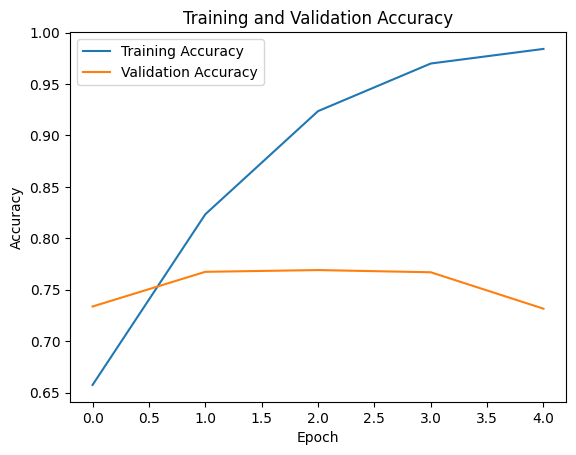

In [16]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **Plot training and validation loss**

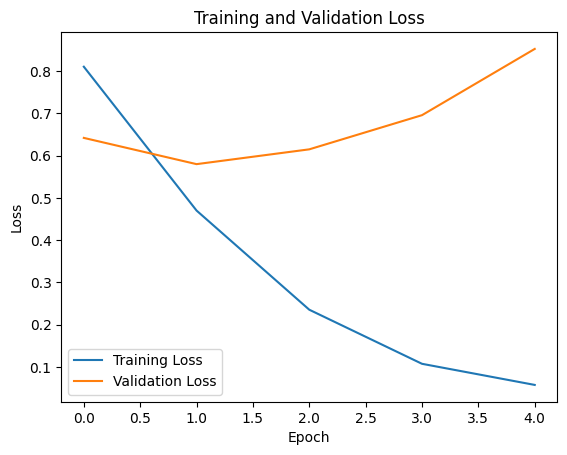

In [17]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **Example: Predict sentiment for a new tweet**

In [18]:
def predict_sentiment(text):

    text_seq = tokenizer.texts_to_sequences([text])
    text_padded = pad_sequences(text_seq, maxlen=maxlen)


    prediction = model.predict(text_padded)
    sentiment = np.argmax(prediction)
    sentiment_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
    return sentiment_mapping[sentiment]


print(predict_sentiment("I do not love flying with this airline! bad service."))
print(predict_sentiment("The flight was delayed for 5 hours. Terrible experience."))
print(predict_sentiment("The flight was okay, nothing special."))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Neutral
